In [2]:
from imports import *
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [192]:
# define some data
N, sig = 10, .3
np.random.seed(3)
x = np.sort(np.random.rand(N)*100)
xmodel = np.linspace(0,100,100)
y = np.sin(2*np.pi*x/50) - .005*x + np.random.randn(N)*sig + np.random.rand(N)*.1
ey = np.repeat(sig,N)

In [193]:
# setup GPs
gp1 = george.GP(george.kernels.ExpSquaredKernel(100))
gp2 = george.GP(george.kernels.ExpSine2Kernel(1,50))

In [194]:
# try to optimize the gps
_=gp1.optimize(x, y, ey)
_=gp2.optimize(x, y, ey)

Optimization terminated successfully.
Optimization terminated successfully.


In [195]:
# setup QP GP from others
l = np.exp(gp1.kernel.vector)
G, P = np.exp(gp2.kernel.vector)
gp3 = george.GP(george.kernels.ExpSquaredKernel(l) * george.kernels.ExpSine2Kernel(G,P))
gp3.compute(x, ey)

In [196]:
# compute GP predictions
mu1,cov1 = gp1.predict(y, xmodel)
sig1 = np.sqrt(np.diag(cov1))
mu2,cov2 = gp2.predict(y, xmodel)
sig2 = np.sqrt(np.diag(cov1))
mu3,cov3 = gp3.predict(y, xmodel)
sig3 = np.sqrt(np.diag(cov1))

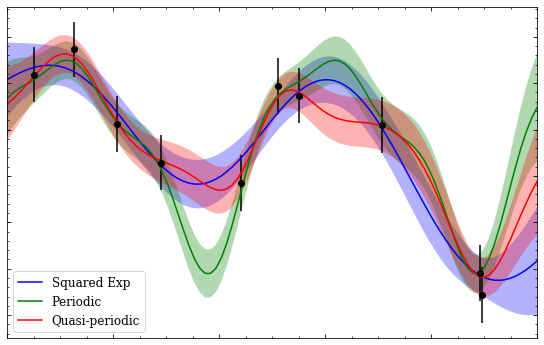

In [197]:
# plot data and mean GPs
fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)
ax.errorbar(x, y, ey, fmt='ko')

ax.fill_between(xmodel, mu1-sig1, mu1+sig1, alpha=.3)
ax.plot(xmodel, mu1, '-', label='Squared Exp')

ax.fill_between(xmodel, mu2-sig2, mu2+sig2, alpha=.3)
ax.plot(xmodel, mu2, '-', label='Periodic')

ax.fill_between(xmodel, mu3-sig3, mu3+sig3, alpha=.3)
ax.plot(xmodel, mu3, '-', label='Quasi-periodic')

ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlim((0,100))

plt.legend(loc='lower left', fontsize=12)
fig.subplots_adjust(bottom=.04, left=.04, top=.96, right=.96)
plt.savefig('/Users/ryancloutier/Research/Thesis/thesis/figures/gpkernels.png')

In [203]:
print np.exp(gp2.lnlikelihood(y) - gp1.lnlikelihood(y))
print gp2.lnlikelihood(y), gp1.lnlikelihood(y)

3.0802565004988414
-7.8466720839953865 -8.971684956896075


In [198]:
print gp1.kernel.value

<bound method ExpSquaredKernel.value of ExpSquaredKernel(244.417057019, ndim=1)>


In [199]:
print gp2.kernel.value

<bound method ExpSine2Kernel.value of ExpSine2Kernel(2.34006162367, 50.5664925464, ndim=1)>


In [200]:
print gp3.kernel.value

<bound method Product.value of ExpSquaredKernel(244.417057019, ndim=1) * ExpSine2Kernel(2.34006162367, 50.5664925464, ndim=1)>


## plot matrices

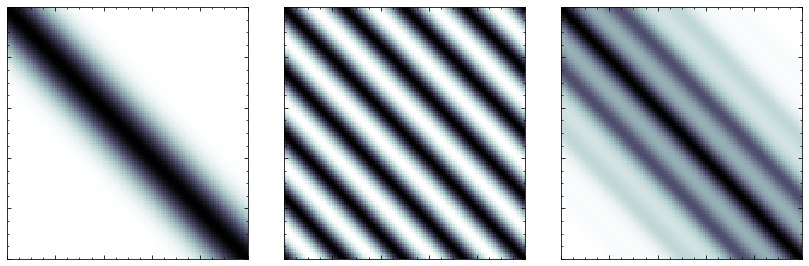

In [260]:
x2 = np.arange(100)#0,100,100)
l, G, P = 100, 1, 25
gp21 = george.GP(george.kernels.ExpSquaredKernel(l))
gp22 = george.GP(george.kernels.ExpSine2Kernel(G,P))
gp23 = george.GP(george.kernels.ExpSquaredKernel(l*7)*george.kernels.ExpSine2Kernel(G,P))

fig = plt.figure(figsize=(12,3.8))
ax1 = fig.add_subplot(131)
ax1.pcolormesh(gp21.get_matrix(x2)[::-1], cmap=plt.get_cmap('bone_r'))
ax1.set_xticklabels('')
ax1.set_yticklabels('')

ax2 = fig.add_subplot(132)
ax2.pcolormesh(gp22.get_matrix(x2)[::-1], cmap=plt.get_cmap('bone_r'))
ax2.set_xticklabels('')
ax2.set_yticklabels('')

ax3 = fig.add_subplot(133)
ax3.pcolormesh(gp23.get_matrix(x2)[::-1], cmap=plt.get_cmap('bone_r'))
ax3.set_xticklabels('')
ax3.set_yticklabels('')

fig.subplots_adjust(bottom=.04, left=.04, right=.96, top=.96, wspace=.15)
plt.savefig('/Users/ryancloutier/Research/Thesis/thesis/figures/gpmatrices.png')